<a href="https://colab.research.google.com/github/stuckic/posCimatec/blob/main/Exploratory_Data_Analysis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROPOSTA DE TRABALHO FINAL
Escolher uma base de dados real e realizar as seguintes atividades:

1 - Descrever a base e todos os atributos;
- Origem dos dados
* https*
- Período de coleta
- Dicionário de dados
- Objetivo principal da análise

2- Limpeza inicial dos dados
- Remover linhas duplicadas;
- Correção dos tipos de dados dos atributos;
- Identificar e tratar dados ausentes (lembrar que podem existir dados ausentes que não sejam nulos, ex.: peso com valor 0, strings como "-", etc.) e tratar (exclusão, preencher com mediana ou, se série temporal, com o valor imediatamente anterior ou posterior);
- Identificar outliers e, se necessário, tratá-los.
- Lembrem-se que outliers podem ser reais, como um salário do presidente da empresa, ou fruto de erros, como uma pessoa com 250 anos. Outliers reais podem ser mantidos em fase de análise exploratória para compreensão dos dados, outliers provenientes de erros devem ser tratados, seja com exclusão ou preenchimento (similar ao tratamento de dados ausentes).

3 - Análise univariada: analisar a distribuição de todos os atributos de acordo com o tipo de informação que eles trazem (atributos contínuos e categóricos são analisados de forma diferente).
Exemplos de análises:
- Identificar presença de outliers;
- Desbalanceamento entre categorias (atributos categóricos);
- Os dados seguem uma distribuição normal? (atributos contínuos);
- Relação entre média, mediana, máximo, mínimo...

4- Análise bivariada:
- Identificar quais atributos são mais correlacionados;
- Escolher um atributo target, analisar os dados em função dele e destacar os insights que tiveram;
- Durante esse processo vocês devem responder pelo menos 7 perguntas envolvendo:
- 2 atributos categóricos;
- 2 atributos contínuos;
- 1 atributo contínuo x 1 atributo categórico.

Postem o notebook e o conjunto de dados. A organização do código, legibilidade e documentação são quesitos avaliativos. Lembrem-se de destacar sempre o que vocês observaram nas tabelas e gráficos gerados.

Basta uma pessoa postar o trabalho por equipe.

#            ANÁLISE EXPLORATÓRIA DOS DADOS DE UM DATASET

---




---



## ETAPA 1 - Descrever a base e todos os atributos

- Origem do conjunto de dados:
https://www.kaggle.com/datasets/sid321axn/heart-statlog-cleveland-hungary-final
- O dataset consiste em 1190 observações relativas a dados de doenças cardíacas, conhecidas como DCV, as quais são a causa número 1 de morte em todo o mundo, com mortalidade anual estimada em 17,9 milhões, o que representa cerca de 32% de todas as mortes em todo o mundo. As DCV são um grupo de distúrbios do coração e dos vasos sanguíneos e incluem doença cardíaca coronária, doença cerebrovascular, doença cardíaca reumática e outras condições. Quatro em cada 5 mortes por DCV são devidas a ataques cardíacos e derrames, e um terço dessas mortes ocorre prematuramente em pessoas com menos de 70 anos de idade.
- O conjunto compõe-se de 11 características comuns, o que o torna o maior conjunto de dados de doenças cardíacas disponíveis para fins de pesquisa. O 12º atributo é relativo ao alvo, que indica se há risco cardíaco.
- Não existe informação do período da coleta.
- Quanto à origem e à proporção de observações, temos:

> Cleveland: 303  
> Hungria: 294  
> Suíça: 123  
> Long Beach VA: 200  
> Stalog (Coração)**: 270

> Total 1190  

** Dataset da Universidade da California. (https://archive.ics.uci.edu/ml/datasets/statlog+(heart))

## DICIONÁRIO DE DADOS

**a) Variáveis:**
- Idade (age): (Contínuo)
      Idade do paciente em anos.
- Sexo (sex): (Categórico)
      0 - Feminino
      1 - Masculino      
- Tipo de dor no peito (chest pain type): (Categórico)
      1 - típica  
      2 - angina típica  
      3 - dor não anginosa   
      4 - assintomática
- Pressão arterial em repouso (resting bp s): (Contínuo)
      Nível de pressão arterial no modo de repouso em mm/HG
- Colesterol (cholesterol): (Contínuo)
      Colestrol sérico em mg/dl
- Glicemia de jejum (fasting blood sugar): (Categórico)
      Níveis de açúcar no sangue em jejum > 120 mg/dl.
      1 - se nível > 120 mg/dl
      0 - se nível <= 120 mg/dl
- Eletrocardiograma em repouso (resting ecg): (Categórico)
      Resultado do eletrocardiograma em repouso são representados em 3 valores distintos:
       0 - Normal
       1 - Anormalidade na onda ST-T
       2 - Hipertrofia ventricular esquerda (Nominal)
- Frequência cardíaca máxima (max heart rate): (Contínuo)
      Frequência cardíaca máxima alcançada
- Angina induzida pelo exercício (exercise angina): (Categórico)
         0 - Não
         1 - Sim
- Depressão “ST” induzido por exercício vs. descanso (oldpeak): (Contínuo)
      Depressão de ST induzida por exercício em comparação com o estado de repouso
- Medida de como o segmento ST do eletrocardiograma (ECG) muda durante o exercício físico(ST slope): (Categórico) ***************(?)
        0 - Normal  
        1 - Ascendente
        2 - Plano
        3 - Descendente (Nominal)
      "O infradesnivelamento do segmento ST é um achado de interesse no ECG ou teste ergométrico.
      Isso porque, dependendo das características do desnível, ele pode sinalizar isquemia ou outras doenças preocupantes."
      (fonte: https://telemedicinamorsch.com.br/blog/infradesnivelamento-do-segmento-st)

- Alvo (target):  
      1 para Risco Cardíaco  
      0 para normal  

## ETAPA 2 - Limpeza inicial dos dados

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Lendo o arquivo CSV
df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

# Fazendo backup de do dataset com os dados originais
backup = df.copy()

# Exigindo dimensões do dataset
df.shape

(1190, 12)

In [ ]:
# Identificando linhas com mesmos valores
# Há 272 registros com valores identicos. Tais registros não foram retirados por duas razões.
# Não é possível classificá-los como sujeira ou erro de digitação porque não estão em sequência e
# porque podem ter origem em pessoas de localidades diversas.
df_duplicados = df[df.duplicated()]
df_duplicados.shape[0]

272

In [ ]:
# Visualizar as informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
# Conferindo primeiras lihas
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
# Conferindo últimas lihas
df.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [ ]:
# Renomeando variáveis
df = df.rename(columns={
    'age': 'idade',
    'sex': 'sexo',
    'chest pain type': 'tp dor no peito',
    'resting bp s': 'pres. art. em repouso',
    'cholesterol': 'colesterol',
    'fasting blood sugar': 'glicemia jejum',
    'resting ecg': 'ecg repouso',
    'max heart rate': 'freq cardíaca máx',
    'exercise angina': 'angina exercício',
    'oldpeak': 'depressão ST',
    'ST slope': 'ST muda durante exercício',
    'target': 'alvo'
})

df['sexo'].replace({0: 'F', 1: 'M'}, inplace=True)

In [ ]:
#Corrigindo os tipos de dados
#'sexo''tp dor no peito' 'glicemia jejum' 'ecg repouso' 'angina exercício' 'depressão "ST" p. exerc. vs. descanso' 'alvo' category
df.loc[:,['sexo', 'tp dor no peito', 'ecg repouso',
          'ST muda durante exercício']] = df[['sexo', 'tp dor no peito',                                                       'ecg repouso',
                                                      'ST muda durante exercício']].astype('category')

conversor = {1: True, 0: False}
df.loc[:,['glicemia jejum',
          'angina exercício', 'alvo']] =  df[['glicemia jejum', 'angina exercício', 'alvo']].replace(conversor)


In [ ]:
#Aplicando stilo
plt.style.use('fivethirtyeight')

mpl.rcParams["figure.figsize"] = [10, 7]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['axes.labelsize'] = 'medium'
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['legend.fontsize'] = 14

## ETAPA 3 - Análise Univariada

In [ ]:
### Descrição dos atributos quantitativos
df.describe()

,idade,pres. art. em repouso,colesterol,freq cardíaca máx,depressão ST
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,139.732773,0.922773
std,9.358203,18.368823,101.420489,25.517636,1.086337
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,188.000000,121.000000,0.000000
50%,54.000000,130.000000,229.000000,140.500000,0.600000
75%,60.000000,140.000000,269.750000,160.000000,1.600000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [ ]:
###### Descrição dos tipos categóricos
df.describe(include=['category', 'bool'])


,sexo,tp dor no peito,glicemia jejum,ecg repouso,angina exercício,ST muda durante exercício,alvo
count,1190,1190,1190,1190,1190,1190,1190
unique,2,4,2,3,2,4,2
top,M,4,False,0,False,2,True
freq,909,625,936,684,729,582,629


In [ ]:
###### Criando subconjunto dos pacientes que possuem risco cardíaco
pac_risco = df[df['alvo'] == True]
pac_risco

,idade,sexo,tp dor no peito,pres. art. em repouso,colesterol,glicemia jejum,ecg repouso,freq cardíaca máx,angina exercício,depressão ST,ST muda durante exercício,alvo
1,49,F,3,160,180,False,0,156,False,1.0,2,True
3,48,F,4,138,214,False,0,108,True,1.5,2,True
8,37,M,4,140,207,False,0,130,True,1.5,2,True
11,58,M,2,136,164,False,1,99,True,2.0,2,True
13,49,M,4,140,234,False,0,140,True,1.0,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1184,57,F,4,140,241,False,0,123,True,0.2,2,True
1185,45,M,1,110,264,False,0,132,False,1.2,2,True
1186,68,M,4,144,193,True,0,141,False,3.4,2,True
1187,57,M,4,130,131,False,0,115,True,1.2,2,True


In [ ]:
###### Criando subconjunto dos pacientes que possuem risco cardíaco
pac_SEM_risco = df[df['alvo'] == False]
pac_SEM_risco

,idade,sexo,tp dor no peito,pres. art. em repouso,colesterol,glicemia jejum,ecg repouso,freq cardíaca máx,angina exercício,depressão ST,ST muda durante exercício,alvo
0,40,M,2,140,289,False,0,172,False,0.0,1,False
2,37,M,2,130,283,False,1,98,False,0.0,1,False
4,54,M,3,150,195,False,0,122,False,0.0,1,False
5,39,M,3,120,339,False,0,170,False,0.0,1,False
6,45,F,2,130,237,False,0,170,False,0.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1175,56,M,2,130,221,False,2,163,False,0.0,1,False
1176,56,M,2,120,240,False,0,169,False,0.0,3,False
1178,55,F,2,132,342,False,0,166,False,1.2,1,False
1182,41,M,2,120,157,False,0,182,False,0.0,1,False


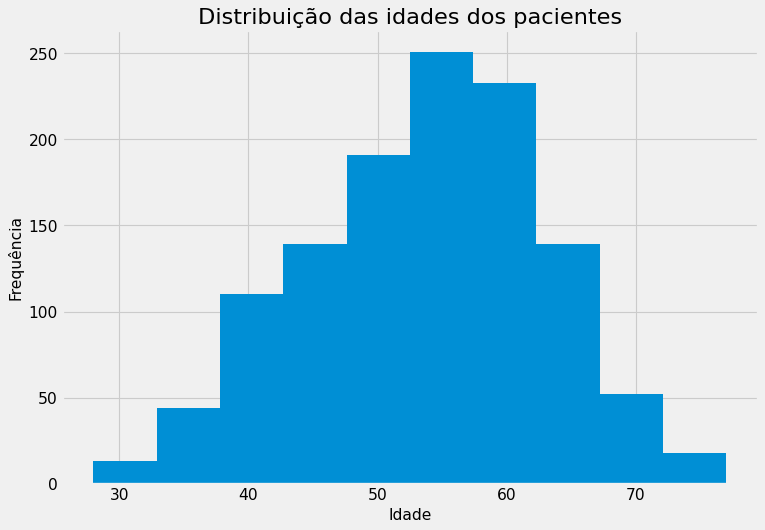

In [ ]:
#### Histograma das idades de todos os pacientes
# Plotando histograma das idades
plt.hist(df["idade"], bins=10)
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.title("Distribuição das idades dos pacientes");

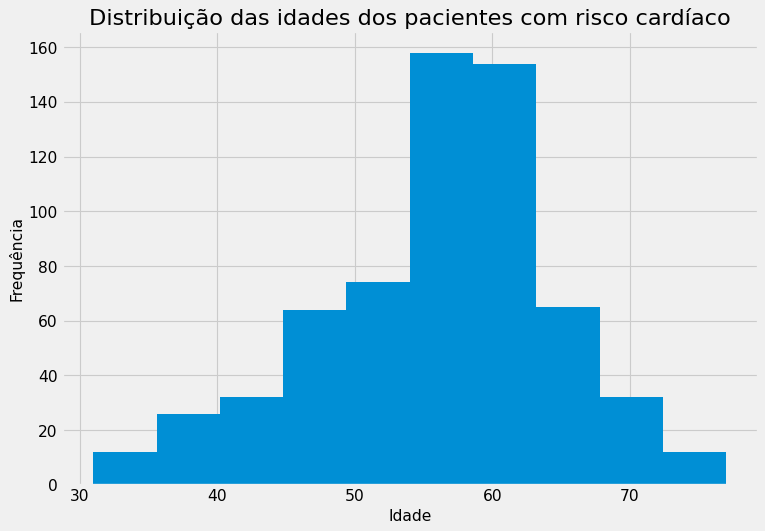

In [ ]:
#### Histograma das idades dos pacientes com risco cardíaco
# Plotando histograma das idades
plt.hist(pac_risco["idade"], bins=10)
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.title("Distribuição das idades dos pacientes com risco cardíaco");

Text(0.5, 1.0, 'Distribuição dos pacientes por sexo')

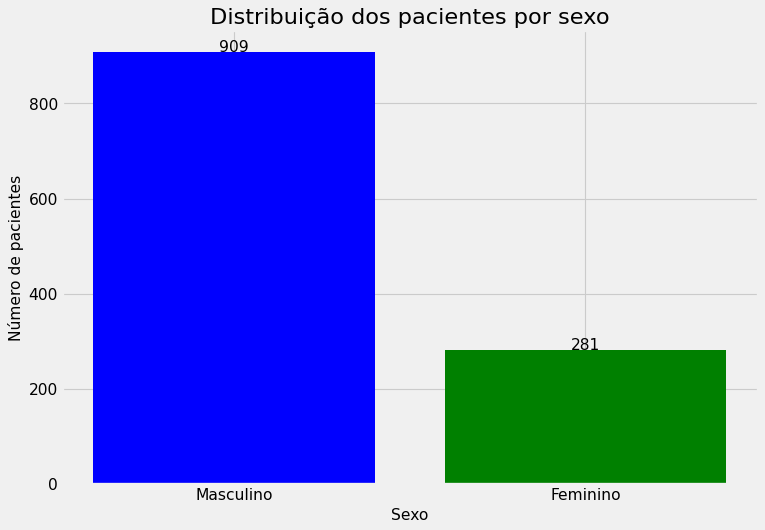

In [ ]:
##### Gráfico de barras do número de pacientes por sexo
# Criando um dataframe contendo o número de pacientes por sexo
sexo_counts = df["sexo"].value_counts()

# Adicionar rótulos individuais para cada barra
plt.text(0, sexo_counts[0]+0.5, sexo_counts[0], ha='center')
plt.text(1, sexo_counts[1]+0.5, sexo_counts[1], ha='center')

# Plotando um gráfico de barras
plt.bar(sexo_counts.index, sexo_counts.values)
plt.xticks([0, 1], ["Masculino","Feminino"])
plt.bar(sexo_counts.index, sexo_counts.values, color=[ 'blue', 'green'])
plt.xlabel("Sexo")
plt.ylabel("Número de pacientes")
plt.title("Distribuição dos pacientes por sexo")

Text(0.5, 1.0, 'Distribuição dos pacientes com risco cardíaco por sexo')

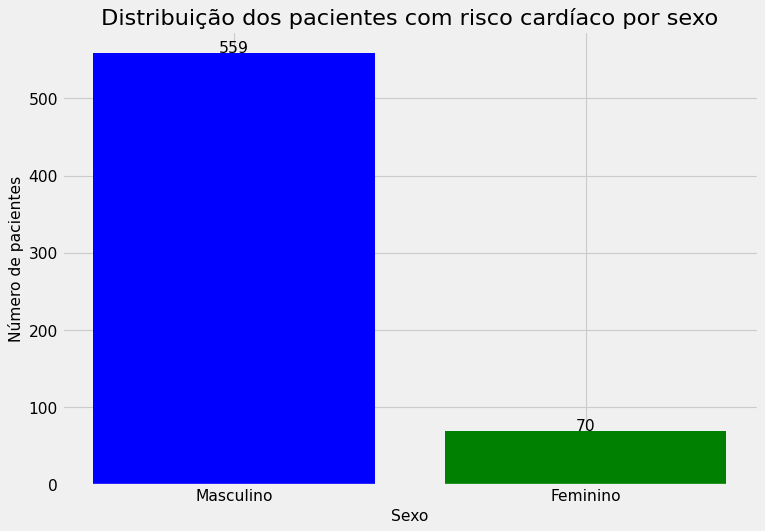

In [ ]:
##### Gráfico de barras do número de pacientes com risco cardíaco por sexo
# Criando um dataframe contendo o número de pacientes por sexo
sexo_counts = pac_risco["sexo"].value_counts()

# Adicionar rótulos individuais para cada barra
plt.text(0, sexo_counts[0]+0.5, sexo_counts[0], ha='center')
plt.text(1, sexo_counts[1]+0.5, sexo_counts[1], ha='center')

# Plotando um gráfico de barras
plt.bar(sexo_counts.index, sexo_counts.values)
plt.xticks([0, 1], ["Masculino","Feminino"])
plt.bar(sexo_counts.index, sexo_counts.values, color=[ 'blue', 'green'])
plt.xlabel("Sexo")
plt.ylabel("Número de pacientes")
plt.title("Distribuição dos pacientes com risco cardíaco por sexo")

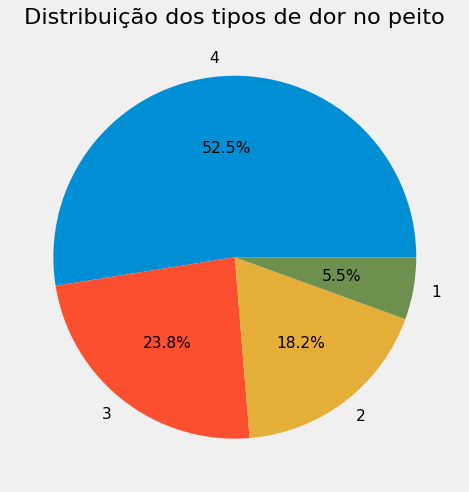

In [ ]:
##### Gráfico de pizza da distribuição dos tipos de dor no peito
cp_counts = df["tp dor no peito"].value_counts()

# Plotando um gráfico de pizza
plt.pie(cp_counts.values, labels=cp_counts.index, autopct='%1.1f%%')
plt.title("Distribuição dos tipos de dor no peito");

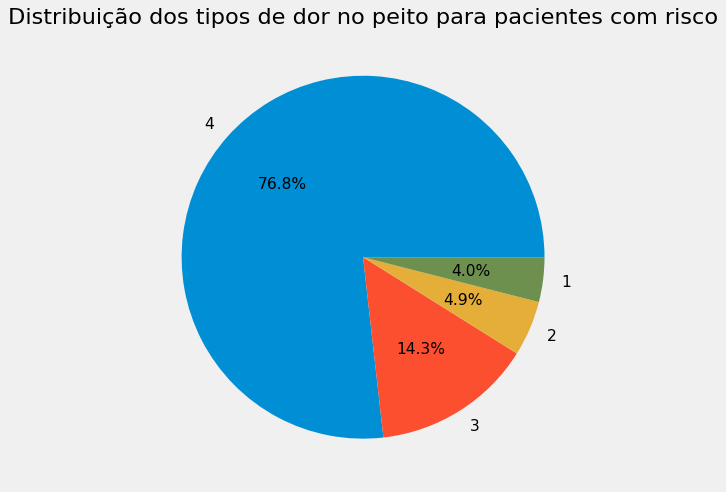

In [ ]:
##### Gráfico de pizza da distribuição dos tipos de dor no peito nos pacientes de risco
cp_counts = pac_risco["tp dor no peito"].value_counts()

# Plotando um gráfico de pizza
plt.pie(cp_counts.values, labels=cp_counts.index, autopct='%1.1f%%')
plt.title("Distribuição dos tipos de dor no peito para pacientes com risco");

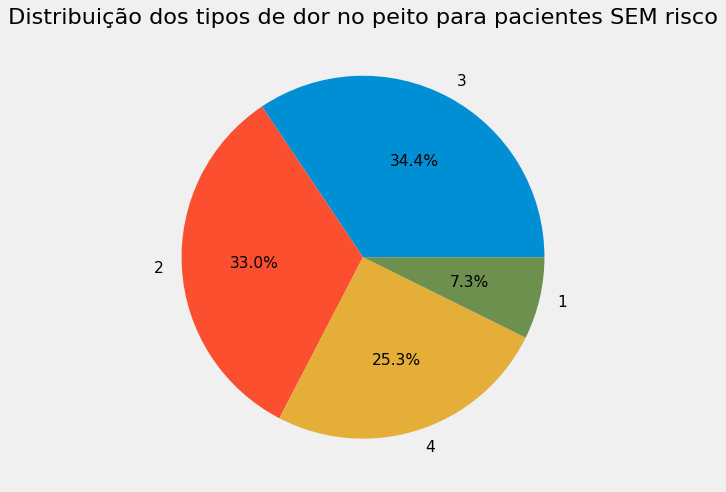

In [ ]:
##### Gráfico de pizza da distribuição dos tipos de dor no peito nos pacientes SEM risco
cp_counts = pac_SEM_risco["tp dor no peito"].value_counts()

# Plotando um gráfico de pizza
plt.pie(cp_counts.values, labels=cp_counts.index, autopct='%1.1f%%')
plt.title("Distribuição dos tipos de dor no peito para pacientes SEM risco");

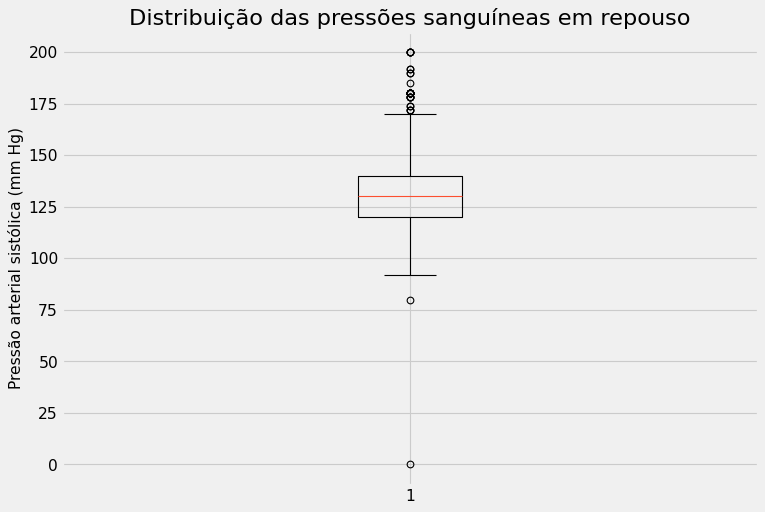

In [ ]:
# Plotando um box plot das pressões sanguíneas em repouso
plt.boxplot(df["pres. art. em repouso"])
plt.ylabel("Pressão arterial sistólica (mm Hg)")
plt.title("Distribuição das pressões sanguíneas em repouso");

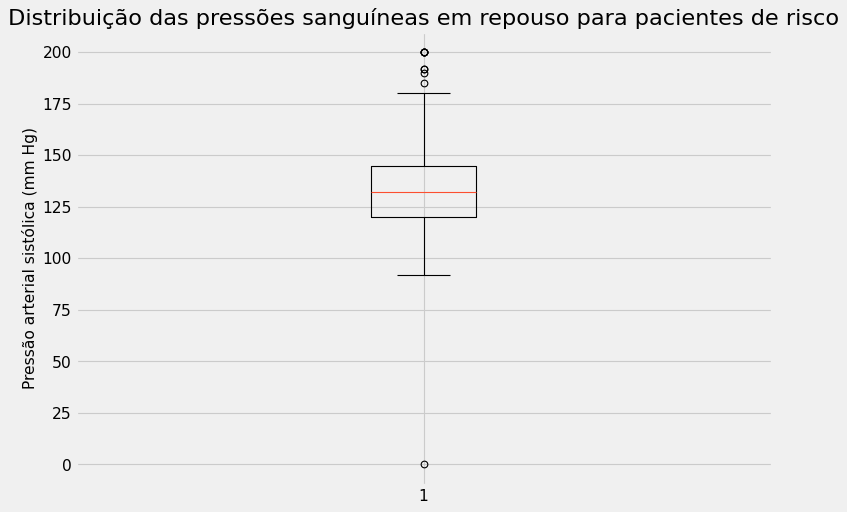

In [ ]:
# Plotando um box plot das pressões sanguíneas em repouso para os pacientes de risco
plt.boxplot(pac_risco["pres. art. em repouso"])
plt.ylabel("Pressão arterial sistólica (mm Hg)")
plt.title("Distribuição das pressões sanguíneas em repouso para pacientes de risco");

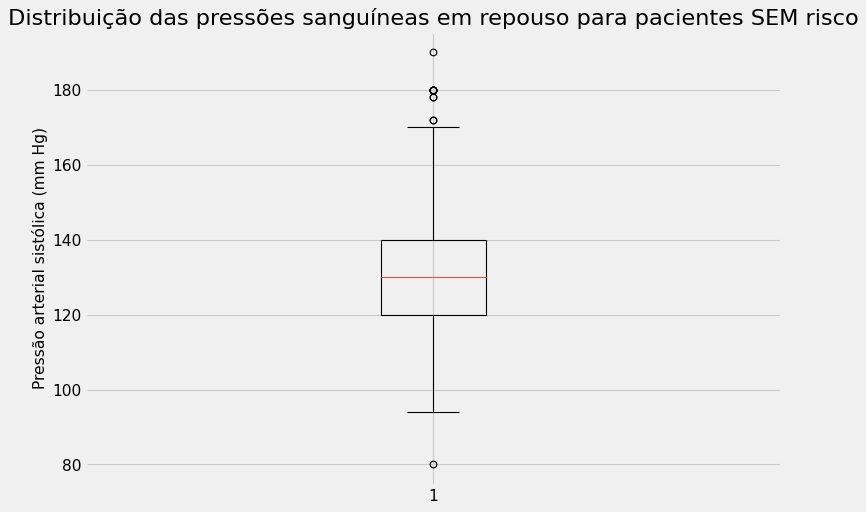

In [ ]:
# Plotando um box plot das pressões sanguíneas em repouso
plt.boxplot(pac_SEM_risco["pres. art. em repouso"])
plt.ylabel("Pressão arterial sistólica (mm Hg)")
plt.title("Distribuição das pressões sanguíneas em repouso para pacientes SEM risco");

## Conclusão Análise Univariada

a) Sexo: Dados indicam que os homens são mais propensos a desenvolver doenças cardíacas do que as mulheres. A taxa de doenças cardíacas no dataset é de aproximadamente 45% para homens e 25% para mulheres;

b) Idade: Pessoas com mais de 45 estão mais propensas a desenvolver doenças cardíacas. *A idade é o fator de risco mais importante no desenvolvimento de doenças cardiovasculares, com aproximadamente o triplo do risco por década de vida. O risco de AVC dobra a cada década após os 50 anos. (fx etarias 0-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, >=8 e incidências)*

c) Colesterol: O gráfico de boxpot indica que as pessoas identificadas como **sem risco** têm o nível de colesterol entre 200 e 270 mg/dl;

d) Pressão arterial em repouso: O grupo identificado como **de risco** tem, em termos de pressão arterial em repouso, valores superiores aos valores do grupo **normal** (vide gráfico boxenplot abaixo).

e) Tipo de Dor: Observa-se que a forma **assintomática** da doença é a que mais ocorre em ambos os sexos. Porém, no sexo masculino, ela ocorre cinco vezes mais (vide gráfico de barras empilhado da distribuição abaixo);




## ETAPA 4 - Análise bivariada

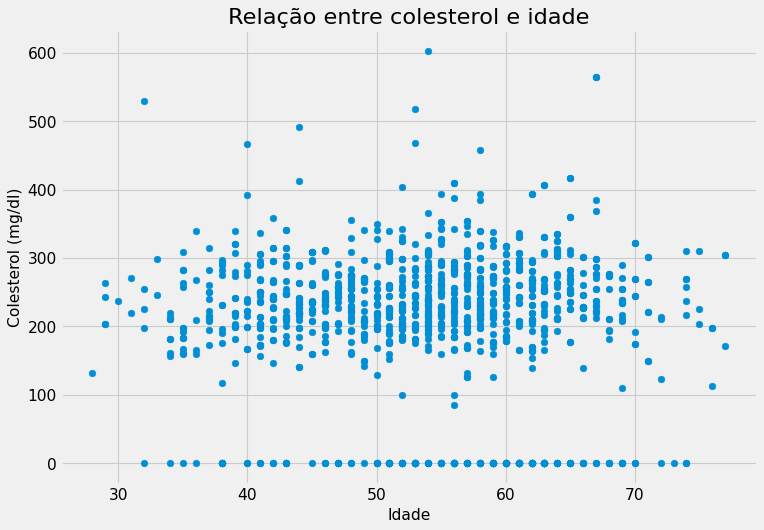

In [ ]:
# Plotando um gráfico de dispersão entre colesterol e idade
plt.scatter(df["idade"], df["colesterol"])
plt.xlabel("Idade")
plt.ylabel("Colesterol (mg/dl)")
plt.title("Relação entre colesterol e idade");

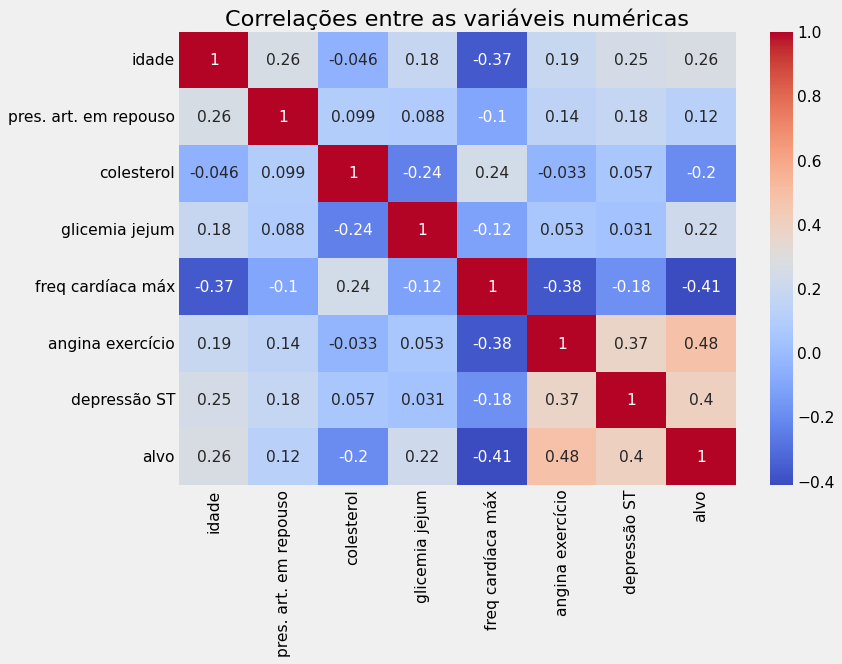

In [ ]:
# Calculando as correlações entre as variáveis numéricas
corr = df.corr()

# Plotando um heatmap das correlações
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlações entre as variáveis numéricas");

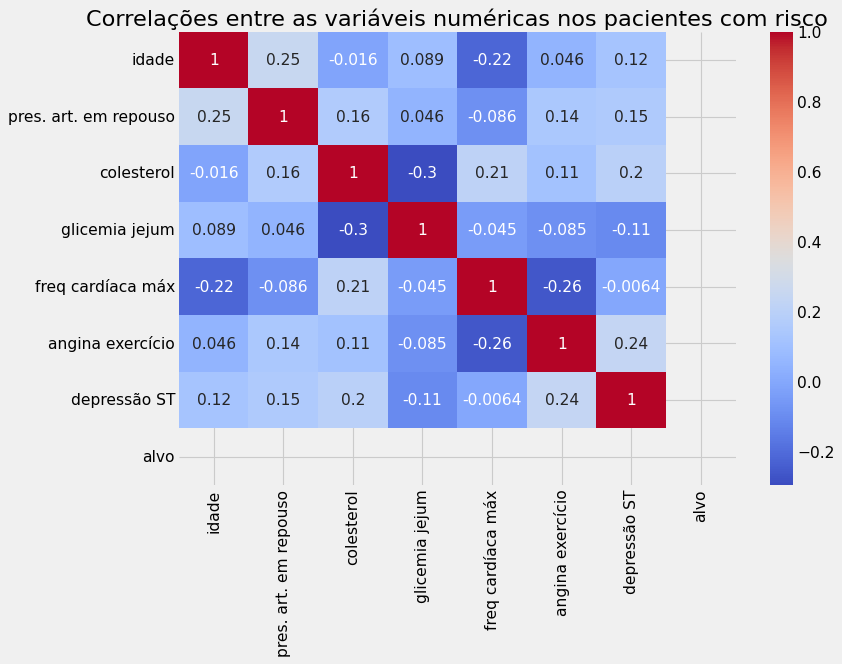

In [ ]:
# Calculando as correlações entre as variáveis numéricas
corr = pac_risco.corr()

# Plotando um heatmap das correlações
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlações entre as variáveis numéricas nos pacientes com risco");

In [ ]:
##### Gráfico de barras empilhado da distribuição dos tipos de dor no peito por sexo:
labels = {1: 'Tipica', 2: 'Angina típica', 3: 'Dor não anginosa', 4: 'Assintomática'}
data = df[df['alvo' == 1]]
sns.countplot(x="tp dor no peito", hue="sexo", data=data)
plt.xticks(ticks=[0, 1, 2, 3], labels=labels.values())
plt.title("Distribuição dos tipos de dor no peito por sexo")
plt.ylabel("Contagem");

KeyError: ignored

In [ ]:
# Outliers - Em quaisquer das colunas numéricas
num_cols = ['idade', 'pres. art. em repouso', 'colesterol', 'glicemia jejum',\
            'freq cardíaca máx', 'depressão “ST” p. exerc. vs. descanso']

# Calcula o intervalo interquartil (IQR) para cada coluna numérica
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Identifica possíveis outliers em cada coluna numérica
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) |\
            (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# linhas do dataset que contêm possíveis outliers
df[outliers]

In [ ]:
#Demonstração de maior propensão dos homens a possuirem doenças cardiacas
generos = df.groupby(['sexo', 'alvo']).size().reset_index(name='counts')
# Criando um gráfico de barras empilhado
sns.set_style('whitegrid')
sns.barplot(x='sexo', y='counts', hue='alvo', data=generos, palette='husl')

# Definindo o título do gráfico e os rótulos dos eixos
plt.title('Distribuição de doenças cardíacas por sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de casos')

In [ ]:
#Distribuição de idades por 'alvo':
sns.displot(data=df, x='idade', hue='alvo', kind='kde')
plt.xlim(0, 100);
plt.xticks(range(0, 100, 10));
plt.ylabel("Desnsidade");

In [ ]:
# Distribuição de gênero por target:
sns.countplot(data=df, x='sexo', hue='alvo');

In [ ]:
#Distribuição de níveis de colesterol por 'alvo':
sns.boxplot(data=df, x='alvo', y='colesterol')
plt.ylim(0, 650);
plt.yticks(range(0, 600, 50));

In [ ]:
# Distribuição de níveis de pressão sanguínea em repouso por target
sns.boxenplot(data=df, x='alvo', y='pres. art. em repouso');

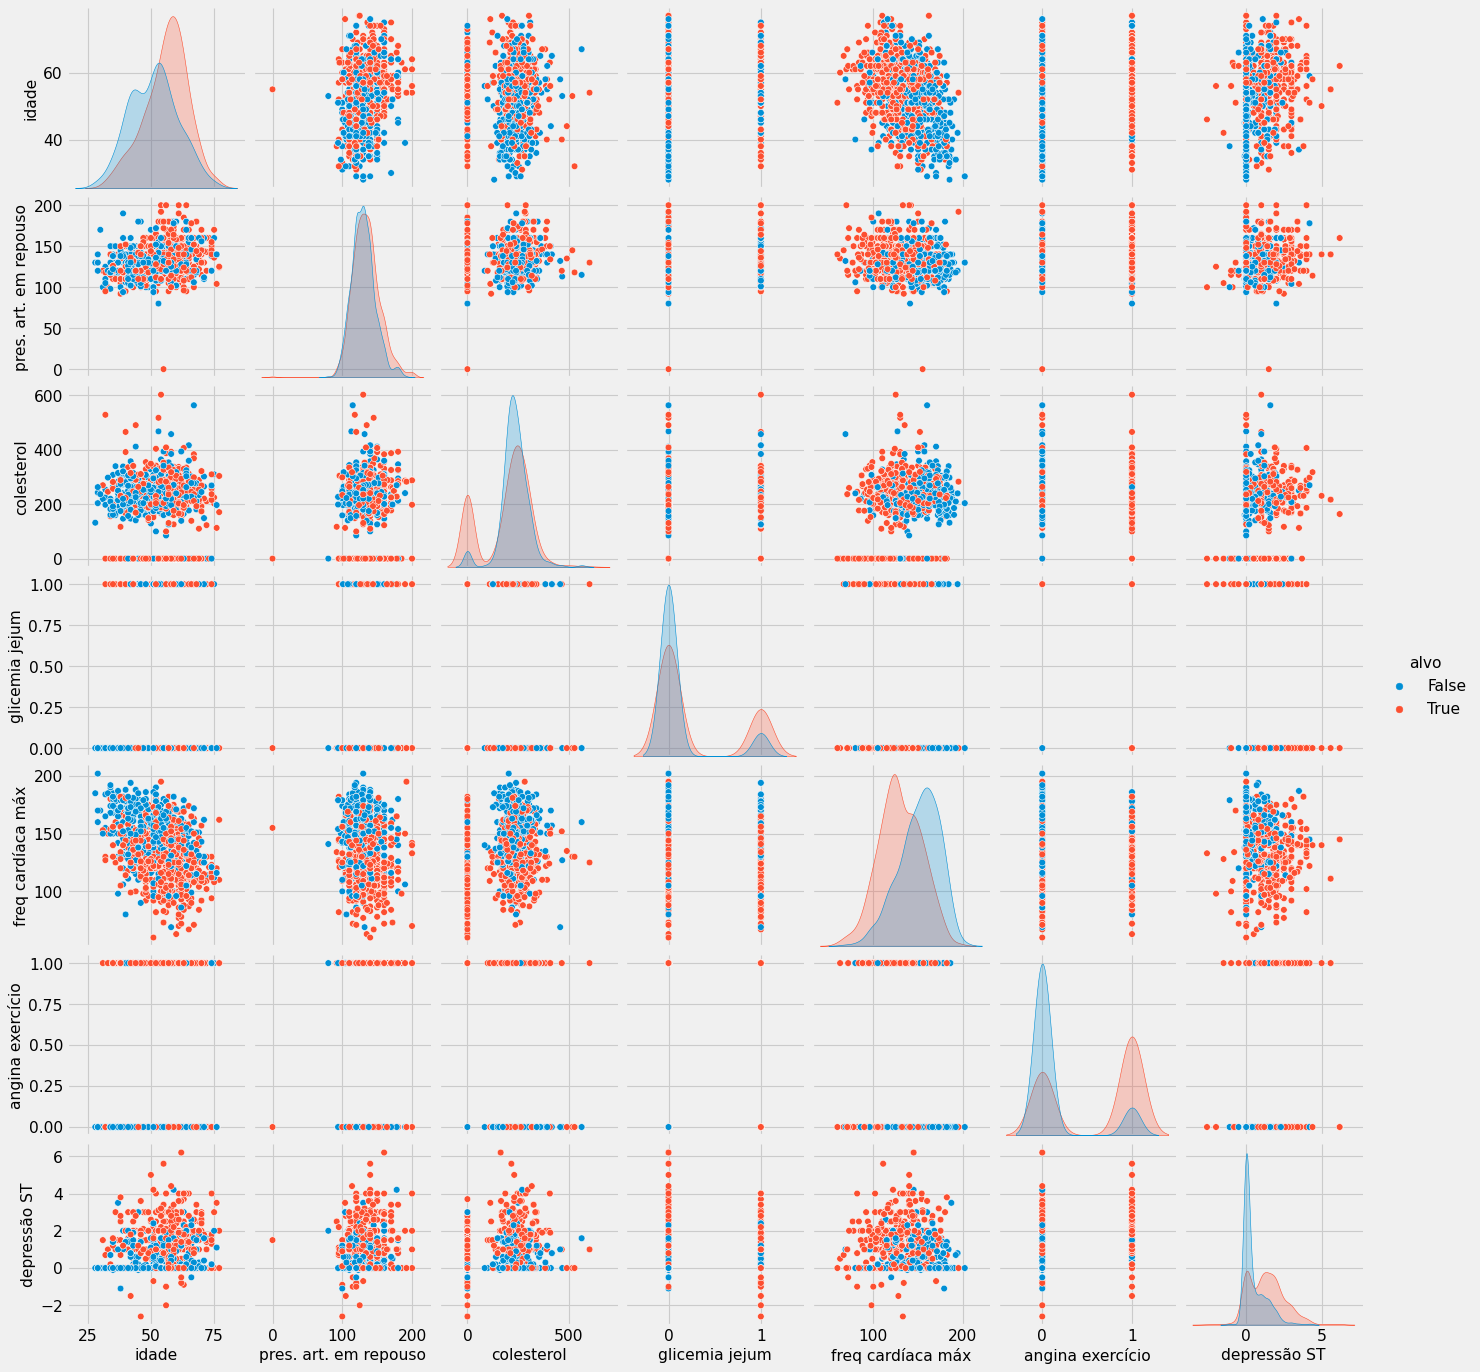

In [ ]:
#análise exploratória dos dados, visualizando estatísticas descritivas e distribuições das variáveis
sns.pairplot(df, hue='alvo')
plt.show()

Features 
       idade  pres. art. em repouso  colesterol  glicemia jejum  \
0        40                    140         289           False   
1        49                    160         180           False   
2        37                    130         283           False   
3        48                    138         214           False   
4        54                    150         195           False   
...     ...                    ...         ...             ...   
1185     45                    110         264           False   
1186     68                    144         193            True   
1187     57                    130         131           False   
1188     57                    130         236           False   
1189     38                    138         175           False   

      freq cardíaca máx  angina exercício  depressão ST  sexo_M  \
0                   172             False           0.0       1   
1                   156             False           1.0       

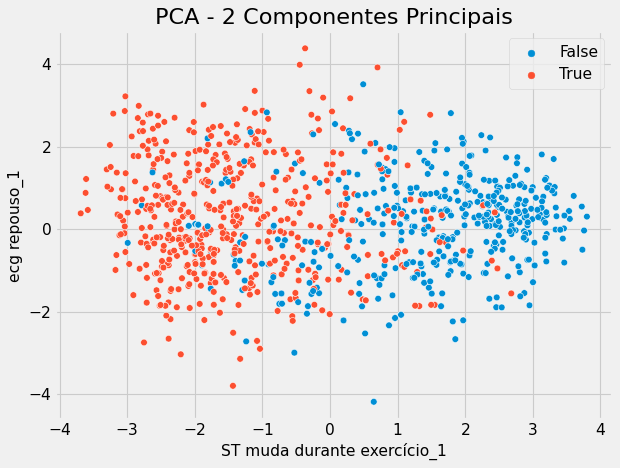

In [ ]:
features = df.drop("alvo", axis=1)
target = df["alvo"]

# Aplicar One-Hot Encoding às colunas categóricas (One-Hot Encoding é uma técnica
# usada para converter variáveis categóricas em representações numéricas)
features = pd.get_dummies(features, drop_first=True)

print("Features \n", features)

#print(features.head)

# Padronizando os dados
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print("Principais Componentes\n",scaled_features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)


print("Principais Componentes \n", principal_components)

# Identificando a coluna mais relevante para cada componente principal
most_important_features = component_features.idxmax(axis=1)
print("\nColunas mais relevantes para cada componente principal:\n", most_important_features)

#Visualizando os resultados do PCA
principal_df = pd.DataFrame(data=principal_components, columns=["Principal Component 1", "Principal Component 2"])
final_df = pd.concat([principal_df, target], axis=1)

#Gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Principal Component 1", y="Principal Component 2", hue="alvo", data=final_df)
plt.xlabel("ST muda durante exercício_1")
plt.ylabel("ecg repouso_1")
plt.title("PCA - 2 Componentes Principais")
plt.legend()
plt.show()